# **Module 2: Class Implementation of Single Neuron Model**

## Introduction
Now that we have introduced classes as a powerful abstraction in Python, we will revisit the Single Neuron Models we implemented previously. By using classes to make our implentation, we are one step closer to the deep learning libraries we will be using going forward.

Recall our single neuron model applied to a regression task where we are predicting some real value $\hat{y}^{(i)} = f(x^{(i)})$ for some datapoint $i$ (where we have used the superscript notation $(i)$ to indicate which of $n$ datapoints we are considering).

We will take the functions we developed previously that implement the forward calculation of $y$ and its gradient with respect to weights, but we will be making them methods of a Single Neuron Model Python class. This will allow us to keep the weights stored as member variables for our specific class instance as well.

## NumPy

In addition to turning our models into classes, we are also going to use the [NumPy Library](https://numpy.org/) to represent our vectors instead of standard Python Lists. NumPy gives us many mathematical operations on vectors and arrays, and provides benefits over standard lists including the ability to write more concise code and performance improvements. Below, we include a brief introduction to the NumPy functionality we will be using in this notebook. If you are looking for a more thorough introduction or additional resources please check out numpy.org's tutorials [here](https://numpy.org/devdocs/user/quickstart.html).



In [ ]:
# First we need to import the NumPy Library, typically we use the np abbreviation
import numpy as np

# You can create a numpy array from a list
x = np.array((1,2,3,4))
y = [1,2,3,4]
z = np.array(y)
print("x:", x)
print("y:", y)
print("z:", z)
print("Notice the difference between the numpy arrays x and z and the python list y.")

# Instead of using a length property like lists, numpy is able to represent
# multi-dimensional arrays, we can see the dimensions by using the shape property
print("Shape of x:", x.shape)
# Here we are creating a multi-dimensional array that is 2x3 filled with 1.'s
a = np.ones((2,3))
print("A multidimensional array")
print(a)
print("Shape of a:", a.shape)

# One of the great things about numpy is that it allows us to perform operations
# on these vectors (or more generally, arrays) without for loops
x = np.array((1,2))
w = np.array((2,2))
z = np.dot(x,w.T)
print("The dot product of x and transpose of w is:", z)

# We can also perform subtraction and scalar multiplication
learning_rate = .01
# Since we are going to perform subtraction with floats, make sure you initialize
# your w_new correctly with float 0. and not the integer 0
w_new = np.array([0.,0.])
## w_new = np.array([0,0]) This won't run!
w_new -= learning_rate * x

print("The value of w_new:", w_new)

# This should cover all of the numpy functionality we are using in this notebook. If
# you would like a more thorough introduction please visit:
# https://numpy.org/devdocs/user/quickstart.html

x: [1 2 3 4]
y: [1, 2, 3, 4]
z: [1 2 3 4]
Notice the difference between the numpy arrays x and z and the python list y.
Shape of x: (4,)
A multidimensional array
[[1. 1. 1.]
 [1. 1. 1.]]
Shape of a: (2, 3)
The dot product of x and transpose of w is: 6
The value of w_new: [-0.01 -0.02]


## Single Neuron Models

Here is a refresher on the single neuron model.

Our single neuron models consist of a single neuron or node, that sums weighted multiplications of the features of an input sample, adds a bias term, and then passes that sum through some activation function.

For **regression**, we will use a **linear** activation function, i.e., just the identity function.

For **classification**, we will use a **sigmoid** function.

More specifically, our single neuron model will take the dot product of an input training example $x^{(i)}$ with some learned weights $w$ and adding a learned bias $w_0$ to produce a pre-activation $z$. We then apply some activation function $f$ to $z$ to produce an activation $a$, which for this single neuron will be our output prediction $\hat{y}$. Importantly, $x$ and $w$ can be vectors, which we will now represent as NumPy arrays in our Python code. We will use a subscript notation, e.g., $x_j$ to indicate feature $j$ within data input $x$, where $j$ goes from 1 to $m$ total features.

The following is the formal mathematical notation for our single neuron model:  

$$
z = x \cdot w^T + w_0\\
a = f(z) \\
y = a
$$

where $x$ and $w$ are row vectors, and the activation function $f$ operates element-wise on the vector $z.$ to produce a scalar $a.$



## Single Neuron Regression Model

In the following code block, we implement the necessary setup for a single neuron regression model class in Python. This will use a linear function $f(z) = z$ as the activation function and is very similar in functionality to what we created in the last notebook.

In [ ]:
# First we need to import packages that will be used for visualization.
# You can ignore this for now as we will explain further in a future notebook
import numpy as np
import math, random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class SingleNeuronRegressionModel():
    def __init__(self, in_features):
        # Create/initialize weights for the number of features
        self.w = np.zeros(in_features)
        self.w_0 = 0.

    def forward(self, x):
        if (x.shape != self.w.shape):
            raise ValueError("shape of input x and weights w should be same")

        # Calculate the pre-activation z
        z = x @ self.w.T + self.w_0

        # Apply the activation function, and return
        a = self.linear(z)
        return a

    # simple linear activation function: just returns identity
    def linear(self, z):
        return z

In [ ]:
# Test model output for a single 2D datapoint:
regression_model = SingleNeuronRegressionModel(in_features=2)
regression_model.w = np.array([5, 3])
regression_model.w_0 = -8

x = np.array([1,2])
y = regression_model.forward(x)
print("input", x, "=> output", y)

input [1 2] => output 3


## Training our regression model - Gradient Descent

Now that we have implemented a regression model class, we want to implement the same training algorithm as before. Recall that we would like to minimize a cost function, $J$, where $J$ is the total *loss* $L$ over our training data:

$$ J = \sum_i^n L(\hat{y}^{(i)}, y^{(i)})$$

For this simple example, we will use squared error (SE) loss where $\epsilon^{(i)}$ is our error for any given sample $i$:

$$ L_{SE}(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2} (\hat{y_i} - y_i)^2 = \frac{1}{2} \epsilon^2 $$


Additionally, recall the training process we implemented in the last notebook.
* We will perform the training loop for a specified number of iterations through our dataset, also known as epochs.
* In each epoch, we will look at each input and output $(x^{(i)},y^{(i)})$ pair. For each pair, we:

  * Calculate the loss $L$ between the correct value $y$ and the predicted value $\hat{y}$
  * Calculate the gradient of the loss with respect to each weight, and
  * Update the weights based on the gradient and the learning rate, $\eta$:
  
$$ w_{j,new} = w_j - \eta \frac{dJ}{dw_j}$$


Although we are implementing our Single Neuron Model in a class, the basic concept of gradient based learning stays the same. We are still nudging each weight along the gradient of the cost funtion with respect to that weight. However the location of where those weights is stored is different and within each instance of our class.



### Gradient descent with squared error (SE) loss

We have repeated the gradient descent for Squared Error Loss here as a reference:

In the case of our squared error loss, for any sample data point $i$ this works out to:

$$ \frac{dJ}{dw_j} = \frac{dL_{SE}}{dw_j}  
  = \frac{dL_{SE}}{d\hat{y}} \frac{d\hat{y}}{dw_j}
  = (\hat{y} - y) \frac{d\hat{y}}{dw_j} $$

Importantly, we see that we need to be able to calculate the gradient of the model output $\hat{y}$ with respect to each weight:

$$ \frac{d\hat{y}}{dw_j} = \frac{df(z)}{dz} \frac{dz}{dw_j} $$

For the linear activation function $f(z) = z$, the first term is very simple: $\frac{df(z)}{dz} = 1$.

For the second term, recall that

$$ z = w_0 + x_1 \cdot w_1 + \cdots + x_j \cdot w_j + \dots + x_m \cdot w_m $$

so $\frac{dz}{dw_j} = x_j$, except for $w_0$, where $\frac{dz}{dw_0} = 1.$



### Gradient descent implementation - squared error loss

In [ ]:
# First we will update our class with a gradient method.
class SingleNeuronRegressionModel():
    def __init__(self, in_features):
        # Create/initialize weights for the number of features
        self.w = np.zeros(in_features)
        self.w_0 = 0.

    def forward(self, x):
        # Calculate the pre-activation z
        z = x @ self.w.T + self.w_0

        # Apply the activation function, and return
        a = self.linear(z)
        return a

    # simple linear activation function: just returns identity
    def linear(self, z):
        return z

    # calculate and save gradient of our output with respect to
    # each weight for our linear activation
    def gradient(self, x):
        self.grad_w = x
        self.grad_w_0 = 1.

    # update weights based on gradients and learning rate
    def update(self, grad_loss, learning_rate):
        # Here grad_loss is gradient of the loss w.r.t. output.
        # This is provided externally, based on the loss function
        # being used for training of this model.
        model.w   -= grad_loss * self.grad_w   * learning_rate
        model.w_0 -= grad_loss * self.grad_w_0 * learning_rate

In [ ]:
# Now our training function takes an instance of our single-neuron
# model as an argument.
#
# We also organize our input_data as an array, num_samples x in_features,
# and our (univariate) output data as an array with dim num_samples.
def train_model_SE_loss(model, input_data, output_data,
                        learning_rate, num_epochs):
    num_samples = len(input_data)
    for epoch in range(1, num_epochs+1):
        total_loss = 0 #keep track of total loss across the data set

        for i in range(num_samples):
            x = input_data[i,...]
            # print("x:", x)
            y = output_data[i]
            y_predicted = model.forward(x)

            # loss function
            error = y_predicted - y
            loss = (error**2)/2
            total_loss += loss

            # gradient of our prediction w.r.t. weights
            model.gradient(x)

            # gradient of loss w.r.t. prediction, for SE
            grad_loss = error

            # update our model based on gradients
            model.update(grad_loss, learning_rate)

        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0: #every few epochs, report
            print("epoch", epoch, "has total loss", total_loss)

In [ ]:
# We will use this function to evaluate how well our trained regression
# model perfoms. This will calculate the mean square error over our data.
def evaluate_regression_accuracy(model, input_data, output_data):
    total_loss = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i,...]
        y = output_data[i]
        y_predicted = model.forward(x)
        error = y_predicted - y
        total_loss += (error**2)/2
    accuracy = total_loss / num_samples
    print("Our model has mean square error of", accuracy)
    return accuracy

## Single Neuron Regression Example

Now that we have our regression model function and our training function, all that's left to do is call each of those on a dataset! Below, we will train the single neuron on the same toy dataset as our initial function implementation and visualize the fit.

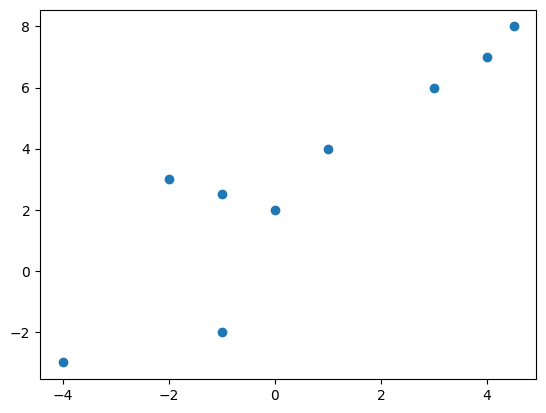

In [ ]:
# Here we have a simple 1D set of 9 input data samples (each
# sample having an x input with 1 feature), and corresponding
# y response.
X_1D = np.array([[1], [-2], [3], [4.5], [0], [-4], [-1], [4], [-1]])
Y_1D = np.array([4,   3,    6,   8,     2,   -3,   -2,   7,   2.5])

# This utility function will allow us to visualize a given 1D dataset.
# You don't need to understand this code right now.
def plot_dataset_1D(x, y):
    x_np = np.array(x)
    # print(f"shape:{x_np.shape}")
    y_np = np.array(y)
    # print(f'x_np:{x_np[...,0]}')
    # print(f'shape now: {x_np[...,0].shape}')
    plt.scatter(x_np[...,0], y_np)

# This utility function will allow us to visualize a 1D fit.
def plot_fit_1D(X, model):
    ylim = plt.ylim()
    x_np = np.array(X)
    y_pred = np.array([model.forward(x) for x in X])
    plt.plot(x_np[...,0], y_pred, color="red")
    #plt.scatter(x_np[...,0], y_pred, color="red")
    plt.ylim(ylim)

# Visualize the above dataset
plot_dataset_1D(X_1D, Y_1D)
#plot_fit_1D(X_1D, [1, 2], 0.5)

### Learn weights for our regression model!

epoch 1 has total loss 75.15118164194563
epoch 10 has total loss 15.91945696552539
epoch 20 has total loss 12.004141710251176
epoch 30 has total loss 11.347063947860194
epoch 40 has total loss 11.234328476762197
epoch 50 has total loss 11.213995802293752
epoch 60 has total loss 11.209941165400341
epoch 70 has total loss 11.20898841694995
epoch 80 has total loss 11.208716012559227
epoch 90 has total loss 11.208624266940278
epoch 100 has total loss 11.208590113287263

Final weights:
[1.20325818] 2.4556015377014955
Our model has mean square error of 1.2040220467545657


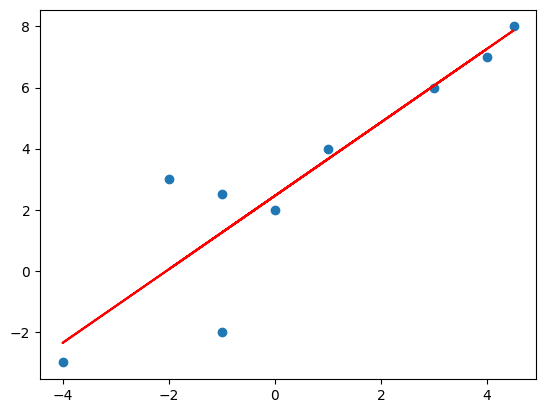

In [ ]:
# In this example we set the learning rate relatively small.
learning_rate = 0.01
epochs = 100

# We create an instance of our SingleNeuronRegressionModel class
# before starting the training process
# print(f'length: {X_1D[0]}')
model = SingleNeuronRegressionModel(in_features=len(X_1D[0]))
train_model_SE_loss(model, X_1D, Y_1D, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_regression_accuracy(model, X_1D, Y_1D)

plot_dataset_1D(X_1D, Y_1D)
plot_fit_1D(X_1D, model)

# Single Neuron Model Base Class
Looking at our first regression model class, it is not very flexible. We can only perform regression tasks with a linear activation function. To solve this, we will create a SingleNeuronModel class that will act as the parent class for different types of single neuron models, including classification.

For each of these classes, the member variables $w$ and $w_0$ remain the same along with the **forward** function.

The **activation** and **gradient** functions will be left unimplemented in our parent class and each child will need to implement them on their own! This is what differentiates our single neuron models. Below we include an implementation of the SingleNeuronModel parent class along with a reimplementation of SingleNeuronRegressionModel from above and an implementation of the SingleNeuronClassificationModel from the last notebook.



## Single Neuron Classification Model
For the classification problem, we will change the activation function to a sigmoid. Recall this squashes the pre-activation $z$ down to an activation (output) that is between 0 and 1. We also need to implement the gradient calculation, with this sigmoid activation function.

### Gradient descent with negative log-likelihood (NLL) loss

We have repeated the gradient descent for negative log-likelihood Loss here as a reference.

In the case of our NLL loss, for any sample data point $i$, the gradient of $J$ with respect to weights works out to:

$$ \frac{dJ}{dw_j} = \frac{dL_{NLL}}{dw_j}  
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dw_j}  
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dz} \frac{dz}{dw_j}
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\sigma{(z)}}{dz} \frac{dz}{dw_j} .
 $$

For the first term, we recall our definition $L_{NLL} = y \log{\hat{y}} + (1-y)\log{(1-\hat{y})}$,
giving us the following after some algebra:

$$ \frac{dL_{NLL}}{d\hat{y}} = \frac{y-\hat{y}}{\hat{y}(1-\hat{y})} .$$

For the second term, our derivative of the activation function $\sigma(z)$, we get:

$$ \frac{d\sigma{(z)}}{dz} = \sigma(z)(1-\sigma(z)  = \hat{y}(1-\hat{y}).$$

And finally, the last term is simply $\frac{dz}{dw_j} = x$, except for $\frac{dz}{dw_0} = 1$.


In [ ]:
# Now we modify our implementation to create an abstract SingleNeuronModel
# class that will be the parent of our regression and classification models
class SingleNeuronModel():
    def __init__(self, in_features):
        #self.w = np.zeros(in_features)
        #self.w_0 = 0.
        # Better, we set initial weights to small normally distributed values.
        self.w = 0.01 * np.random.randn(in_features)
        self.w_0 = 0.01 * np.random.randn()
        self.non_zero_tolerance = 1e-8 # add this to divisions to ensure we don't divide by 0


    def forward(self, x):
        # Calculate and save the pre-activation z
        self.z = x @ self.w.T + self.w_0

        # Apply the activation function, and return
        self.a = self.activation(self.z)
        return self.a

    def activation(self, z):
        raise ImplementationError("activation method should be implemented by subclass")

    # calculate and save gradient of our output with respect to weights
    def gradient(self, x):
        raise ImplementationError("gradient method should be implemented by subclass")

    # update weights based on gradients and learning rate
    def update(self, grad_loss, learning_rate):
        model.w   -= grad_loss * self.grad_w   * learning_rate
        model.w_0 -= grad_loss * self.grad_w_0 * learning_rate


# Reimplement our single neuron regression model using the base SingleNeuronModel
class SingleNeuronRegressionModel(SingleNeuronModel):
    # Linear activation function for regression model
    def activation(self, z):
        return z

    # Gradient of output w.r.t. weights, for linear activation
    def gradient(self, x):
        self.grad_w = x
        self.grad_w_0 = 1.


# New implementation! Single neuron classification model
class SingleNeuronClassificationModel(SingleNeuronModel):
    # Sigmoid activation function for classification
    def activation(self, z):
        return 1 / (1 + np.exp(-z) + self.non_zero_tolerance)

    # Gradient of output w.r.t. weights, for sigmoid activation
    def gradient(self, x):
        self.grad_w = self.a * (1-self.a) * x
        self.grad_w_0 = self.a * (1-self.a)

In [ ]:
# Test: regression model output for a single 2D datapoint:
model = SingleNeuronRegressionModel(in_features=2)
model.w = np.array([5, 3])
model.w_0 = -8

x = np.array([1,2])
y = model.forward(x)
print("input", x, "=> output", y)

input [1 2] => output 3


In [ ]:
# Test: classification model output for a single 2D datapoint:
model = SingleNeuronClassificationModel(in_features=2)
model.w = np.array([5, 3])
model.w_0 = -8

x = np.array([1,2])
y = model.forward(x)
print("input", x, "=> output", y)

input [1 2] => output 0.9525741177484588


## Single Neuron Classification Example

Now we turn to training the SingleNeuronClassificationModel.

Recall that for the classification problem, we will use a different loss function: the negative log-likelihood (NLL) loss. This will enable our previous training code to still work, but for the classification rather than regression problem.

In [ ]:
# Training process, using negative log likelihood (NLL) loss --
# appropriate for classification problems.

def train_model_NLL_loss(model, input_data, output_data,
                         learning_rate, num_epochs):
    non_zero_tolerance = 1e-8 # add this to the log calculations to ensure we don't take the log of 0
    num_samples = len(input_data)
    for epoch in range(1, num_epochs+1):
        total_loss = 0 #keep track of total loss across the data set

        for i in range(num_samples):
            x = input_data[i,...]
            y = output_data[i]
            y_predicted = model.forward(x)

            # NLL loss function
            loss = -(y * np.log(y_predicted + non_zero_tolerance) + (1-y) * np.log(1-y_predicted + non_zero_tolerance))
            total_loss += loss

            # gradient of prediction w.r.t. weights
            model.gradient(x)

            #gradient of loss w.r.t. prediction, for NLL
            grad_loss = (y_predicted - y)/(y_predicted * (1-y_predicted))

            # update our model based on gradients
            model.update(grad_loss, learning_rate)

        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0: #every few epochs, report
            print("epoch", epoch, "has total loss", total_loss)

In [ ]:
# We will use this function to evaluate how well our trained classifier perfoms
def evaluate_classification_accuracy(model, input_data, labels):
    # Count the number of correctly classified samples given a set of weights
    correct = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i,...]
        y = labels[i]
        y_predicted = model.forward(x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
        else:
            print("Misclassify", x, y, "with activation", y_predicted)
    accuracy = correct / num_samples
    print("Our model predicted", correct, "out of", num_samples,
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

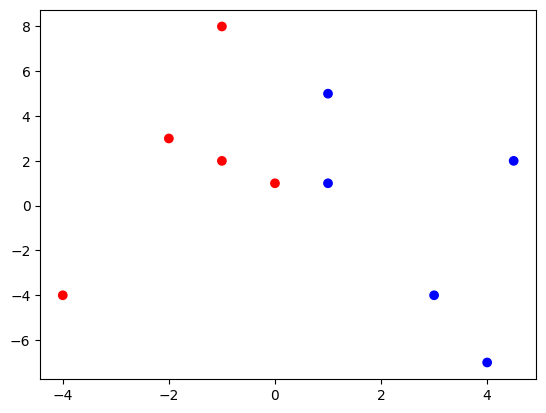

In [ ]:
# Here we have a dataset of 2D linearly separable datapoints
input_data = np.array([[1, 1],
              [1, 5],
              [-2, 3],
              [3, -4],
              [4.5, 2],
              [0, 1],
              [-4, -4],
              [-1, 2],
              [4, -7],
              [-1, 8]])
# And their corresponding labels
labels = [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]

# This utility function will allow us to visualize a given 2D dataset.
# You don't need to understand this code right now.
def plot_dataset_2D(x, y):
    x_np = np.array(x)
    x_np.reshape(len(x), 2)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    plt.scatter(x_np[...,0], x_np[...,1], color=colors)

# This utility function will allow us to visualize a 2D decision boundary
def plot_decision_boundary_2D(w, w_0):
    ylim = plt.ylim()
    x1 = np.arange(-5,6)
    plt.plot(x1, (-w_0 - w[0]*x1)/w[1])
    plt.ylim(ylim)

# Visualize the above dataset
plot_dataset_2D(input_data, labels)
# plot_decision_boundary_2D([1, 0.0001], -0.5)

We can see from the plot that the dataset is linearly separable, meaning we can separate the positive samples (blue) from the negative samples (red) with a straight line.

## Training Real Weights -- Single Neuron Classifier

Now that we have our same toy dataset, we can train our new Single Neuron Classifier class the same way as before. Recall the three different knobs we can turn: the initial weights, the learning rate, and the number of epochs. Each of these impacts the model's ability to converge on a decision boundary.

This should be extremely familiar as we are going to perform the same exercises, just with our new class implementation!


Remember, as a general rule of thumb, we would like our learning rate to be small compared to the values of our input data, our initial weights relatively small (often, randomly initialized), and the number of epochs relatively large. There is a lot of research that has been done to determine the optimal settings for these parameters, so this is definitely a simplification.

2
epoch 1 has total loss 6.4542091532354595
epoch 10 has total loss 3.131345489791431
epoch 20 has total loss 2.4330995431980016
epoch 30 has total loss 2.1026982690204923
epoch 40 has total loss 1.8929825504774764
epoch 50 has total loss 1.7414302971182785
epoch 60 has total loss 1.6237868180338528
epoch 70 has total loss 1.5282603322524726
epoch 80 has total loss 1.4482569290833547
epoch 90 has total loss 1.3797222500024435
epoch 100 has total loss 1.3199874716782587

Final weights:
[ 1.6914924  -0.08332253] -0.16976836560695455
Our model predicted 10 out of 10 correctly for 100.0 % accuracy


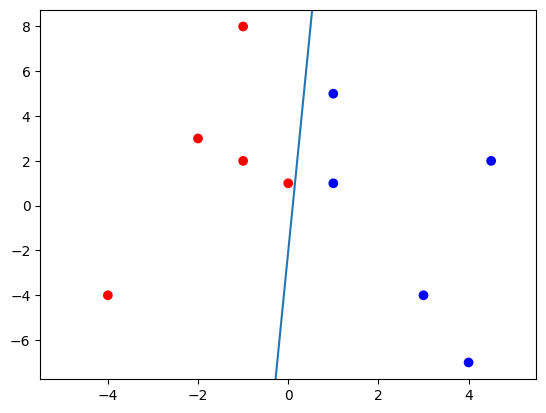

In [ ]:
# In this example we set the learning rate relatively small.
# However, we only train for a few epochs which is not
# enough to converge on an accurate classifier. You can play
# with number of epochs (and/or learning_rate) to obtain an
# accurate classifier.
learning_rate = 0.01
epochs = 10
epochs = 100

print(len(input_data[0]))
model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(model.w, model.w_0)

In [ ]:
# Try running model and loss on full X (input_data) and Y (labels)
model.forward(input_data)

array([0.80736893, 0.75136163, 0.02174453, 0.99465269, 0.99930648,
       0.43562243, 0.00133451, 0.11581439, 0.99922593, 0.0742372 ])

In [ ]:
evaluate_regression_accuracy(model, input_data, labels)

Our model has mean square error of 0.015406154480068199


0.015406154480068199

## Your Turn: 3D Dataset

Now that we have redone the exercises on our 2D datasets with our new class implementation, it's your turn to do the same with the 3D dataset!

<Axes3D: >

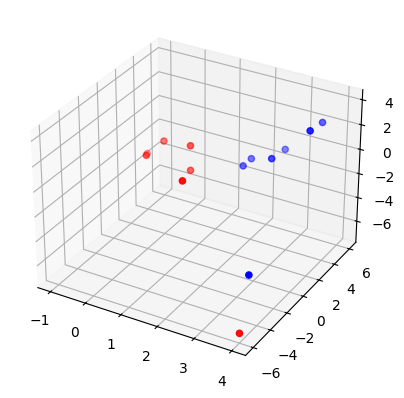

In [ ]:
# Below is a 3D dataset of binary labeled samples. You should be able to use
# the existing functions to train a perceptron that perfectly classifies the
# dataset with a decision plane model_function
input_data = np.array([
     [1,1,1],
     [1,1,-1],
     [-1,4,-3],
     [2,4,-1],
     [3.5,6,2],
     [4,-6,-7],
     [2,-4,2],
     [4,-5,-3],
     [0,2,0],
     [3,2,1],
     [4,2,4],
     [2.5,6,-1],
     [0,0,0],
     [2,3,-1]])
labels = [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

# This is a utility function for displaying the dataset in a 3D graph
# Don't worry about this code for now
def plot_3d_dataset(x, y):
    x_np_3d = np.array(x)
    x_np_3d.reshape(len(x),3)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(x_np_3d[...,0], x_np_3d[...,1],x_np_3d[...,2], color = colors)
    return ax

# This is a utility function for displaying the 3D decision boundary for a given
# set of weights
def plot_3d_decision_boundary(ax, w, w_0):
  x = np.linspace(-1,4,10)
  y = np.linspace(-1,6,10)
  X,Y = np.meshgrid(x,y)
  Z = (-X*w[0] - Y*w[1] - w_0)/w[2]
  surf = ax.plot_surface(X, Y, Z)
  ax.set_zlim(-10,5)
  return
plot_3d_dataset(input_data, labels)

In [ ]:
# TODO: Please fill in the following code to come up with a set of weights
# that classify the dataset to 90% accuracy or better:

model = ...
# YOUR CODE HERE

#print(model.w, model.w_0)
#ax = evaluate_classification_accuracy(model, input_data, labels)
#plot_3d_dataset(ax, input_data, labels)

## Solution to 3D Dataset Example

epoch 1 has total loss 9.407772307772847
epoch 10 has total loss 7.089374779911308
epoch 20 has total loss 6.441370114863625
epoch 30 has total loss 5.947190287747854
epoch 40 has total loss 5.531510709199632
epoch 50 has total loss 5.175041654441427
epoch 60 has total loss 4.86677609058347
epoch 70 has total loss 4.598359320852226
epoch 80 has total loss 4.363066241327053
epoch 90 has total loss 4.155439249220675
epoch 100 has total loss 3.971044765645157

Final weights:
[1.06045314 0.37584154 0.18158836] -1.589063287627139
Misclassify [1. 1. 1.] 0 with activation 0.5072044372157435
Our model predicted 13 out of 14 correctly for 92.85714285714286 % accuracy


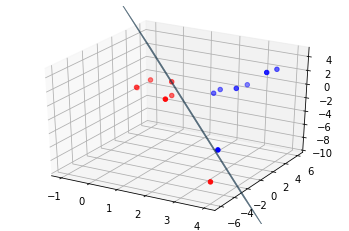

In [ ]:
# In this example we set the learning rate relatively small.
# However, we only train for a few epochs which is not
# enough to converge on an accurate classifier.
learning_rate = 0.01
epochs = 100
#epochs = 1000

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
ax = plot_3d_dataset(input_data, labels)
plot_3d_decision_boundary(ax, model.w, model.w_0)

## Non Linearly Separable Data

Now although classes are a very powerful tool, they are still not powerful enough to allow our Single Neuron Model to determine good decision boundaries for non linearly separable data.

However, now that we understand the basics of classes, we can start using the fully featured machine learning library [Pytorch](https://pytorch.org/). This library uses all of the concepts we have learned thus far to create extremely sophisticated Neural Networks that will allow us to tackle more complex datasets. Stay tuned for Module 3 where we dive into all the great functionality this library offers!

If you would like a refresher on a non lineaerly separable dataset we have included the same one below. Even with our new class implementation we are unable to find a perfect classifier.

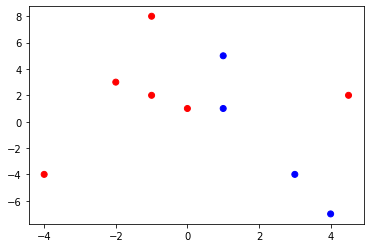

In [ ]:
input_data = np.array([
     [1, 1],
     [1, 5],
     [-2, 3],
     [3, -4],
     [4.5, 2],
     [0, 1],
     [-4, -4],
     [-1, 2],
     [4, -7],
     [-1, 8]])
# By changing the label of our 4th input [4.5, 2],
# we make this dataset not linearly separable
labels = [1, 1, 0, 1, 0, 0, 0, 0, 1, 0]

plot_dataset_2D(input_data, labels)

epoch 1 has total loss 6.762071525071627
epoch 100 has total loss 5.015977438443233
epoch 200 has total loss 5.002844418324068
epoch 300 has total loss 5.002575663124355
epoch 400 has total loss 5.002711946100711
epoch 500 has total loss 5.002763064843282
epoch 600 has total loss 5.002777825124896
epoch 700 has total loss 5.002781861942977
epoch 800 has total loss 5.0027829509433195
epoch 900 has total loss 5.002783243657053
epoch 1000 has total loss 5.002783322259759

Final weights:
[ 0.45136506 -0.16969305] -0.6477719549359985
Misclassify [1. 1.] 1 with activation 0.40948374510323504
Misclassify [1. 5.] 1 with activation 0.2602110002936167
Misclassify [4.5 2. ] 0 with activation 0.7396181217244462
Our model predicted 7 out of 10 correctly for 70.0 % accuracy


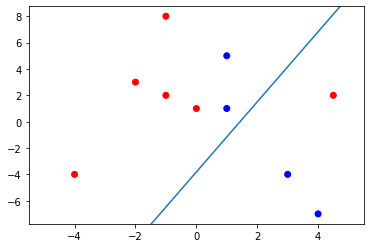

In [ ]:
# Our training algorithm tries to learn a "good" model,
# even though it cannot find a perfect one (i.e, there is no
# single neuron linear classifier that can perfectly separate
# this data).
learning_rate = 0.01
epochs = 1000

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(model.w, model.w_0)

## Multi Layer Perceptrons -- Towards Deeper Neural Networks

Stay tuned for Module 3 where we will use Pytorch to introduce Deeper Neural Networks to tackle problems like the above! Pytorch has features that makes it extremely easy to build networks with **multiple layers** that contain **multiple nodes**! We will see that this can enable more complicated decision boundaries than just lines or planes, and do a better job on data like the above.